# Deep learning Deep Dive Part 1: Neural network to learn XOR function

<b>Author</b>: Kenny Goh <BR>
<b>Date updated</b>: 20/07/2020

XOR is a function that accepts two boolean arguments (x1 and x2) and returns true if either x1 or x2 is true.

| x1.  | x2.  | XOR. |
|------|------|------|
|   0  | 0    | 0    |
|   1  | 0    | 1    |
|   0  | 1    | 1    |
|   1  | 1    | 0    |


For this demo, we are going to train a simple neural net to approximate XOR function by giving it examples.

The neural net will learn the following function

$Y=f(X * \theta)$ <BR>
where <BR>
  -$Y$ is the ground truth labels. eg [0,1,1,..] <BR>
  -$f$ is the XOR function <BR>
  -$X$ is the input features e.g [0,0],[1,0],[0,1],... <BR>
  -$\theta$ is the parameters e.g $W + b$ that the deep learning algorithm will learn through backprops <BR> 
    
How deep learning finds the optimal $\theta$ parameters is the "crux" of neural network. In neural network, a model can learn the linear/non-linear boundaries between different input features through calculus (finding the slope of a computation graph), optimization (finding the gap between actual Y value and predicted Y value during training) and then adjusting the $\theta$ parameters on each iteration of the training step so that gap (loss function) is minimized over the period of the training. Think of it as the neural network drawing a non-linear line between the features in N dimensions where N is the number of feature (X1 belongs here, X2 belongs there...).
    
After the model is trained (with sufficient data and good parameters choice), the model will be able to predict Y given X input. In this XOR example, if you ask the model, "hey.. what is the XOR value of true and false?", it will go like this like this.. "I can say with 99.99 probability the answer is a yes". "and how and why?" you asked. The reply is "I have constructed a large multi-floor factory (layers) that can learn to replicate any products (e.g output of XOR function) by having the the minions (nodes) follow specific instructions (weights and biases) to move parts upstream to match the end product. The parts becomes more detailed and complete as it moves upstream (non-linear boundaries). The final product will resemble the end product based based on the feedback loop on each training example (loss function and gradient descent) where instructions (weights and biases) are constantly being fine-tuned so that the replicated product becomes identical to the end product. Based on the training so far, the accuracy so far is 99.99% on validation data, so that is your answer.
    
Wow! Jarvis who? Isn't it amazing that we can teach deep learning neural network to figure out how to replicate XOR function by just showing it examples instead of telling it what exactly to do? Welcome to the fascinating world of deep learning.

## Setup

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from operator import xor
import random
from numpy.random import seed

seed(1) # Reproducible result

def generate_dataset(size: int)->(np.ndarray,np.ndarray):
    """ 
    generate random XOR dataset
    returns a pair of numpy array where the first element is the X features and the second
            element is the Y label
    """ 
    x_data = []
    y_labels = []
    for i in range(0,size):
        a = bool(random.getrandbits(1))
        b= bool(random.getrandbits(1))
        y = xor(a,b)
        x_data.append([a,b])
        y_labels.append(y)
    return (np.array(x_data), np.array(y_labels))

def predict(a: bool, b:bool)->bool:
    """ Helper function to predict whether a pair of boolean is true or false
    """
    predict = model.predict(np.array([[a,b]]))
    return predict[0][0] >= 0.5

def plot_decision_boundary(model, X, y):
    """ Helper function to plot feature boundaries
    """
    #Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:,1].max() + 1
    h = 0.01
    
    # Generate a grid of points with distance h between them
    resolution = 100 # 100x100 background pixels
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
 
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.where(Z.reshape(xx.shape) > 0.5, 1, 0)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x1')
    plt.xlabel('x2')
    axes = plt.gca()
    axes.set_xlim([-0.1,1.5])
    axes.set_ylim([-0.1,1.5])
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
    plt.show()

Using TensorFlow backend.
/Users/gohk/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/gohk/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/gohk/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/gohk/opt/anaconda3/lib/python3.7/site-pa

## Data generation

Neural network rely on examples to learn the Y labels (called the ground truth). Since I am lazy, I am going to generate the data instead of manually creating a table.

In [2]:
x, y = generate_dataset(10000) # Generate 10,000 examples
print(x[0],'->',y[0]) # Output example 1
print(x[1],'->',y[1]) # Output example 2
print(x[2],'->',y[2]) # Output example 3

[ True False] -> True
[False False] -> False
[False  True] -> True


## Feature representations

The graph below represents the following truth table.

| x1.  | x2.  | XOR. |
|------|------|------|
|   0  | 0    | 0    |
|   1  | 0    | 1    |
|   0  | 1    | 1    |
|   1  | 1    | 0    |

Blue = 0.0 (False) <BR>
Red = 1.0 (True)
    

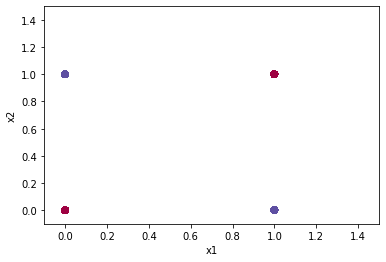

In [3]:
axes = plt.gca()
axes.set_xlim([-0.1,1.5])
axes.set_ylim([-0.1,1.5])
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(x[:,0], x[:,1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


## Model

The NN model to approximate $Y=f(X * \theta)$ <BR>

The NN model consists of the following layers <BR>
- Layer 0 (Input $X$): Vector with shape $(2,N_x)$ 
- Layer 1 (Hidden Layer): $Z^{[1]} =W_i^{[1]}*X+B_i^{[1]}, A_i^{[1]}=relu(Z_i{[1]})$ where $i$ represents indexed position of hidden nodes
- Layer 2 (Output Node): $Z^{[2]} =W^{[2]}*A^{[1]}+B^{[2]}, A^{[2]}=\sigma(Z^{[2]})$ 
<BR><BR>
Terms:<BR>
-${[l]}$ : lth layer <BR>
-$\sigma$ : [Sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) <BR>
-relu : [Relu linear rectifier function](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) <BR>
-$N_x$ : number of X training examples
    
Think of the units in the layers as bunch of neurons. A neuron has input connections and also output connection. The purpose of the neuron is to compute an activation function (A) based on regression function (Z) performed on the previous layer, $Z_i^{[l]}=W_i^{[l]}.A^{[l-1]} + B$. The activation function can squash the resulting Z number to a certain range, eg. 0 or 1 (Sigmoid), -1 and 1 (Tanh). For more detailed explanation on activation function, [visit this link](https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/).

In NN, we tend to use Relu or Tanh for hidden nodes and sigmoid for the output layer if we want to perform binary classification (0 or 1).
    

Instructions for updating:
Colocations handled automatically by placer.


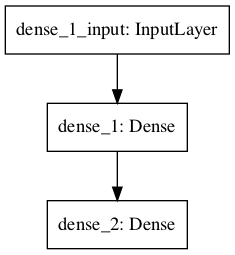

In [4]:
model = Sequential()
# model.add(Dense(5, input_shape=(2,), activation="relu"))
# model.add(Dense(10, input_shape=(2,), activation="relu"))
model.add(Dense(25, input_shape=(2,), activation="relu"))
# model.add(Dense(10, input_shape=(2,), activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Thank goodness for Keras, otherwise we will need to implement our own deep learning algorithm from scratch..

plot_model(model)

## Training (Fail until you make it)

This is actually where deep learning gets exciting. You give it many examples, the neural network will eventually figure out the mappings between  $Y=f(X * \theta)$ <BR>

The neural network starts with really lousy accuracy (random weights + biases), but it will get better over time as it learns from more examples. The model accuracy and loss function chart below shows how the learning algorithm fares over epochs (entire pass of single training dataset).
    
All of this is possible due to gradient descent algorithms and loss functions.
    
We will not cover gradient descent and optimization functions here, for the purpose of this demo, I will give you a rough intuition about this two ideas:

Loss functions - In neural network, we use loss functions to compute the error between between the Y label (the ground truth label) and the predicted Y value. There are many type of loss functions such as MSE (mean square error), cross entropy loss function and so on. For the purpose of this demo, we will use entropy loss function because it is suitable for binary classification where the output needs to be between 0.0 and 1.0
    
Gradient descent algorithms - This is an algorithm where the neural network tries to minimize the error in the loss function by "stepping down the hill" through calculus in backward propagation. Each time, we go through an iteration in the training, the algorithm finds the delta (for moving down the hill in small step) and update the $\theta$ parameters. Repeated many times, the algorithm will converge at the bottom of the hill at some point, which means the error between the Y label and the prediction is minimized, in other words the prediction is more accurate.

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
10000/10000 [==============================] - 0s 27us/step - loss: 0.6226 - accuracy: 0.9330
Epoch 2/5
10000/10000 [==============================] - 0s 12us/step - loss: 0.5314 - accuracy: 1.0000
Epoch 3/5
10000/10000 [==============================] - 0s 12us/step - loss: 0.4249 - accuracy: 1.0000
Epoch 4/5
10000/10000 [==============================] - 0s 12us/step - loss: 0.3127 - accuracy: 1.0000
Epoch 5/5
10000/10000 [==============================] - 0s 13us/step - loss: 0.2137 - accuracy: 1.0000
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
________________

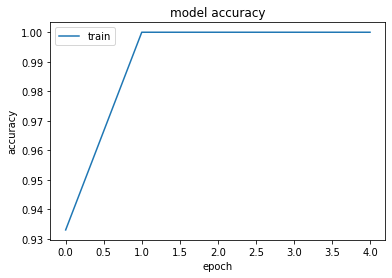

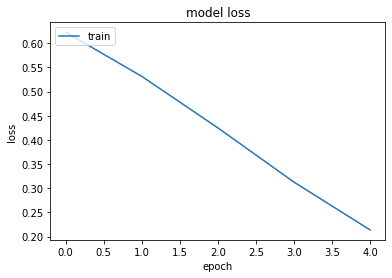

In [5]:

# Train the model using generated dataset, with batch size of 64 (process 64 examples at a time) 
# and 20 epochs (repeat the whole dataset 20 times) please.. 
history = model.fit(x, y, batch_size=64, epochs=5)

#Sanity check
print(model.summary())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Magic time! Let the prediction begins...

In [6]:
print("F F", predict(False,False))
print("T F",predict(True,False))
print("F T",predict(False,True))
print("T T", predict(True,True))

F F False
T F True
F T True
T T False


## Feature boundaries after learning

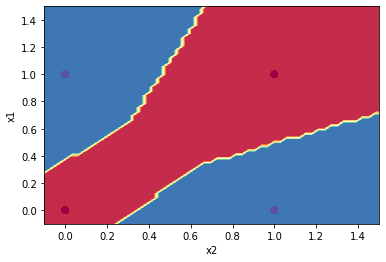

In [7]:
plot_decision_boundary(model,x, y)

## Learned parameters $\theta$

In [8]:
print("W1:", model.layers[0].get_weights()[0])

W1: [[ 7.5499570e-01  6.7839932e-01  5.4502141e-01  8.1388563e-01
   4.1886955e-01  7.2760379e-01 -1.2043905e-01 -3.6579284e-01
  -9.2441684e-01  2.1485220e-01  3.5946712e-01  4.9969372e-01
   4.9156246e-01 -2.6053530e-01 -4.1793495e-02 -2.4163890e-01
   1.3686605e-03 -2.4057072e-01 -3.0600971e-01 -4.0280670e-01
  -4.1824409e-01  4.3013808e-01 -6.7357564e-01 -7.9590154e-01
   1.9894052e-01]
 [-7.5322276e-01 -6.7698944e-01  5.4471308e-01 -8.1128669e-01
   1.9154383e-01 -7.2540081e-01 -2.8929350e-01 -2.6263893e-01
   9.2532825e-01 -2.1649207e-01 -1.5184510e-01  4.9814287e-01
  -4.8919874e-01  4.1575119e-02 -1.7889518e-01 -4.2783526e-01
   1.7731649e-01 -2.3334193e-01 -7.9543889e-03  4.0357825e-01
  -4.0337443e-04  4.2891648e-01  6.7400295e-01  7.9696155e-01
   2.6099557e-01]]


In [9]:
print("B1:", model.layers[0].get_weights()[1])

B1: [ 5.4838636e-04  7.5421744e-04 -5.4535180e-01 -3.5252998e-04
 -1.6437416e-03 -2.9484788e-04  0.0000000e+00  0.0000000e+00
 -1.9847837e-03  4.4177142e-01  4.0275127e-01 -4.9868852e-01
 -4.1103340e-04 -4.2651039e-02  0.0000000e+00  0.0000000e+00
  4.0832183e-01  0.0000000e+00  0.0000000e+00 -3.3389908e-04
  0.0000000e+00 -4.2965883e-01 -1.7769467e-03 -3.2776626e-04
 -1.4556048e-03]


In [10]:
print("W2:", model.layers[1].get_weights()[0])

W2: [[ 0.72028244]
 [ 0.92310244]
 [-0.71359426]
 [ 1.0967884 ]
 [ 0.29914024]
 [ 1.2203953 ]
 [ 0.06187588]
 [-0.00770265]
 [ 0.98931   ]
 [-0.50382227]
 [-0.680745  ]
 [-0.8117773 ]
 [ 0.6796558 ]
 [-0.16503118]
 [ 0.06516731]
 [-0.2622503 ]
 [-0.34521124]
 [ 0.19292545]
 [ 0.28633833]
 [ 0.76356655]
 [-0.24146423]
 [-0.96179014]
 [ 0.81461084]
 [ 1.0379984 ]
 [ 0.23134995]]


In [11]:
print("B2:", model.layers[1].get_weights()[1])

B2: [-0.4053619]
